In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import skimage.filters as f
from skimage import exposure
import skimage.io as io
from scipy import fftpack as ff
from scipy import ndimage as nd
from PIL import Image

# Question 1

In [2]:
def freqz2(P, Q, T, param):
    u = np.arange(0,P,1.0)
    v = np.arange(0,Q,1.0)
    idx = np.where(u>P/2)
    u[idx] = u[idx] - P
    idy = np.where(v>Q/2)
    v[idy] = v[idy]-Q
    V,U = np.meshgrid(v,u)
    D = (V**2 + U**2)**(1/2)
    out = np.zeros((P, Q))
    if (T == "ILPF"):
        for i in range(P):
            for j in range(Q):
                if (D[i][j] <= param):
                    out[i][j] = 1
    elif (T == "GLPF"):
        for i in range(P):
            for j in range(Q):
                out[i][j] = math.exp((-1*(D[i][j]**2))/(2*(param**2)))
    elif (T == "BLPF"):
        for i in range(P):
            for j in range(Q):
                out[i][j] = 1/(1+(D[i][j]/param)**4)
    return out

In [3]:
out = freqz2(9, 9, "ILPF", 1)
print(out)

[[1. 1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Question 2

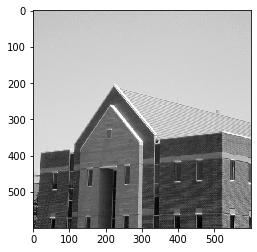

In [4]:
img = plt.imread('images/building-600by600.tif')
plt.gray()
plt.imshow(img)

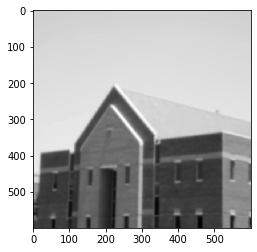

In [5]:
imgBlurred = nd.gaussian_filter(img, 2.5) #(5,5,1)
plt.imshow(imgBlurred)

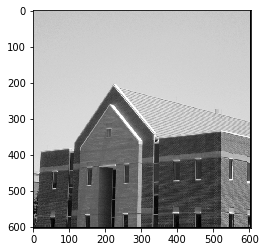

In [6]:
imgPadded = np.pad(img, [(0, 4), (0, 4)], mode='constant', constant_values=0)
plt.imshow(imgPadded)

In [7]:
imgDFT = ff.fft2(imgPadded)
H = freqz2(imgPadded.shape[0], imgPadded.shape[1], "GLPF", 50)

In [8]:
imgFiltered = np.multiply(imgDFT, H)

In [9]:
imgOut = ff.ifft2(imgFiltered)[0:img.shape[0]][0:img.shape[1]]

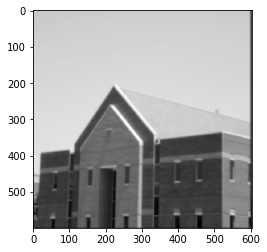

In [10]:
imgOut = np.abs(imgOut)
plt.imshow(imgOut)

# Question 3

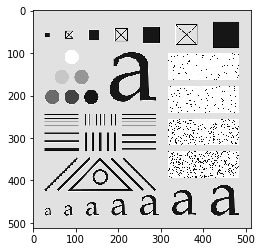

In [11]:
img3 = plt.imread("images/testpattern512.tif")
plt.imshow(img3)

In [12]:
def filterImage (img, amount):
    imgDFT = ff.fft2(img)
    H = freqz2(img.shape[0], img.shape[1], "GLPF", amount)
    imgFiltered = np.multiply(imgDFT, H)
    imgOut = ff.ifft2(imgFiltered)
    return np.abs(imgOut)

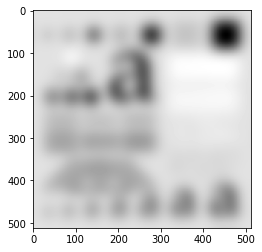

In [13]:
img31 = filterImage(img3, 5)
plt.imshow(img31)

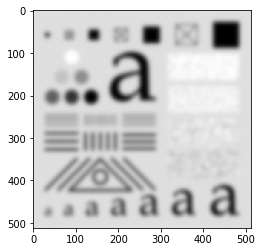

In [14]:
img32 = filterImage(img3, 15)
plt.imshow(img32)

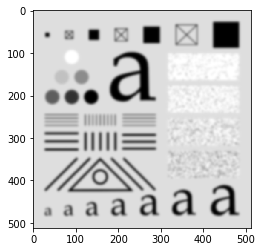

In [15]:
img33 = filterImage(img3, 30)
plt.imshow(img33)

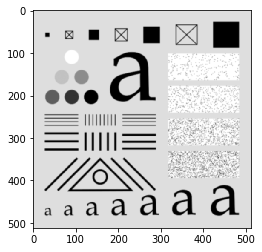

In [16]:
img34 = filterImage(img3, 80)
plt.imshow(img34)

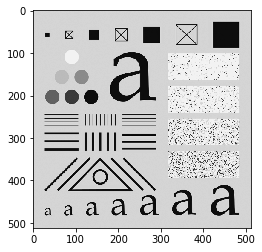

In [17]:
img35 = filterImage(img3, 230)
plt.imshow(img35)

# Question 4

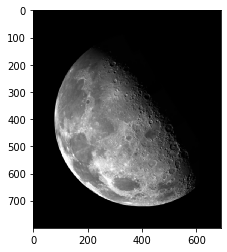

In [18]:
img4 = plt.imread("images/blurry-moon.tif")
plt.imshow(img4)

In [19]:
def UnsharpMaskImage (img, amount, k):
    imgDFT = ff.fft2(img)
    H = freqz2(img.shape[0], img.shape[1], "GLPF", amount)
    H = np.subtract(1,H)
    H = np.multiply(H,k)
    H = np.add(H,1)
    imgFiltered = np.multiply(imgDFT, H)
    imgOut = ff.ifft2(imgFiltered)
    return np.abs(imgOut)

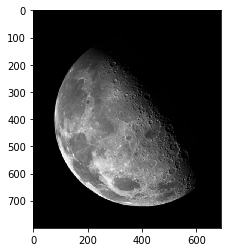

In [20]:
img41 = UnsharpMaskImage(img4, 100, 1)
plt.imshow(img41)

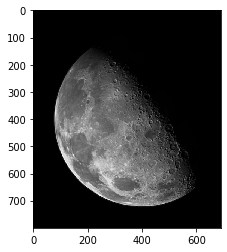

In [21]:
img42 = UnsharpMaskImage(img4, 100, 2)
plt.imshow(img42)

# Question 5

# Question 6

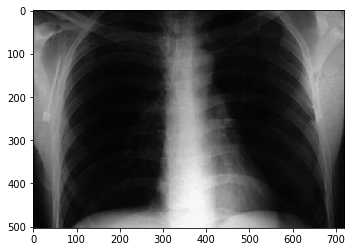

In [22]:
img6 = plt.imread("images/chestXray.tif")
plt.imshow(img6)

In [52]:
def filterImageButterWorth (img, amount):
    imgDFT = ff.fft2(img)
    H = freqz2(img.shape[0], img.shape[1], "BLPF", amount)
    imgFiltered = np.multiply(imgDFT, H)
    imgOut = ff.ifft2(imgFiltered)
    return np.abs(imgOut)

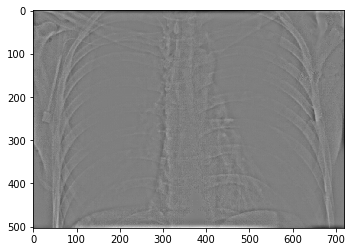

In [56]:
img61 = filterImageButterWorth(img6, 20)
img6Temp = img6 - img61
plt.imshow(img6Temp)

In [41]:
def UnsharpMaskButterWorth (img, amount):
    imgDFT = ff.fft2(img)
    H = freqz2(img.shape[0], img.shape[1], "BLPF", amount)
    H = np.subtract(1,H)
    H = np.multiply(H,5)
    H = np.add(H,5)
    imgFiltered = np.multiply(imgDFT, H)
    imgOut = ff.ifft2(imgFiltered)
    return np.abs(imgOut)

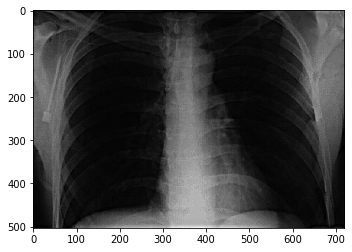

In [57]:
img62 = UnsharpMaskButterWorth(img6, 20)
plt.imshow(img62)

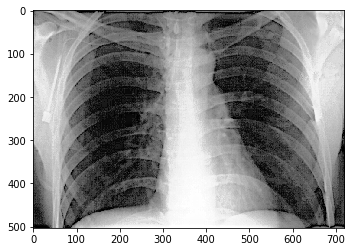

In [58]:
img63 = exposure.equalize_hist(img62)
plt.imshow(img63)